#Classification

#Loading Dataset for classification

In [3]:
#mounting google drive in colab to access and save files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#reading a CSV file containing water potability data from Google Drive.
dt = pd.read_csv('/content/drive/MyDrive/AI/water_potability.csv')
dt

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


#Data Inspection and Exploration

* Who created the Dataset?
-> The dataset was created by Laksika Tharmalingam, who is a DataScience UnderGraduate 2 years ago.

* How did I get access to the dataset?
-> One of the biggest data science platforms, Kaggle, provided me with access to the dataset. Those working in data science and machine learning utilize it.

 Columns:

- pH
- Hardness
- Solids
- Chloramines
- Sulfate
- Conductivity
- Organic carbon
- Trihalomethanes
- Turbidity



The potability classification values 1 (potable) and 0 (not potable) constitute the target variable.

Objestive:

The main objective of this data set involves measuring water suitability through quality water assessments. This dataset helps organizations make wise treatment decisions and supports inspections of sanitary conditions and checks the quality of water used at its sources for human purposes.

Data Usage

The dataset allows people to design water treatment solutions and examine water purity and protect drinking water sources from harmful substances. The dataset enables water purification facilities together with environmental organizations and researchers to use data for making decisions about water purity and potability in their facilities.


In [6]:
dt.head() #displaying the first few rows of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
dt.tail()#displaying the last few rows of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [8]:
dt.shape #showing the dimensions (number of rows and columns) of the dataset

(3276, 10)

In [9]:
dt.info() #providing information about the data types, non-nulls counts, and memory usage of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
dt.isnull().sum() #counting the missing values in each column of the dataset

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [11]:
dt.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


#Summary Statistics

In [12]:
dt.describe() #generating descriptive of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
dt.var() #calculating the variance of each column in the dataset

,0
ph,2.541855e+00
Hardness,1.081079e+03
Solids,7.688783e+07
Chloramines,2.506158e+00
Sulfate,1.715355e+03
Conductivity,6.532529e+03
Organic_carbon,1.094394e+01
Trihalomethanes,2.616309e+02
Turbidity,6.089967e-01
Potability,2.379968e-01


#Data Cleaning

In [14]:
#function to replace missing values with column means and applying it to the dataset
def replace_missing_value_with_mean(dt):
  col_means = dt.mean()
  dt = dt.fillna(col_means)
  return dt
dt = replace_missing_value_with_mean(dt)

In [15]:
#rounding and converting non-'Potability' columns to integer in the dataset
for cols in dt.columns:
  if cols!="Potability":
    dt[cols]=dt[cols].round().astype('int64')
dt.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


In [16]:
dt.isnull().sum() #checking for missing values after rounding and conversion to integer.

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


#Data Visualization

###Univariate Analysis

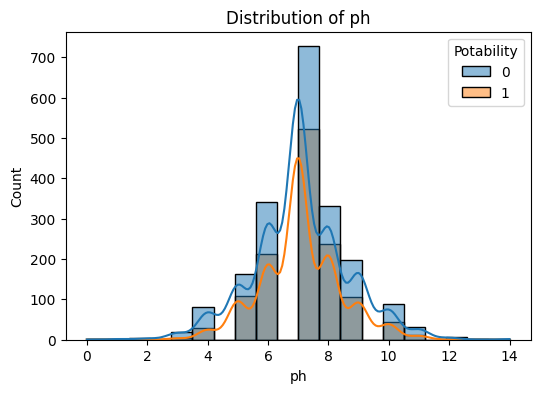

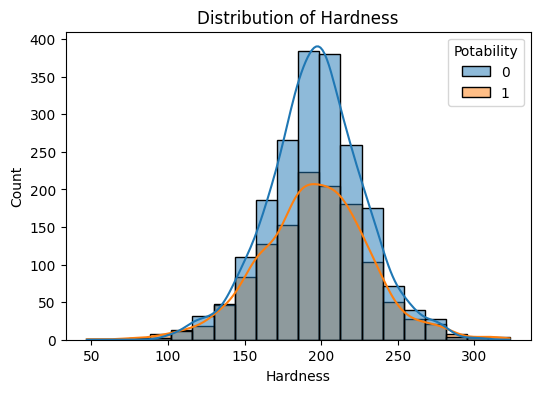

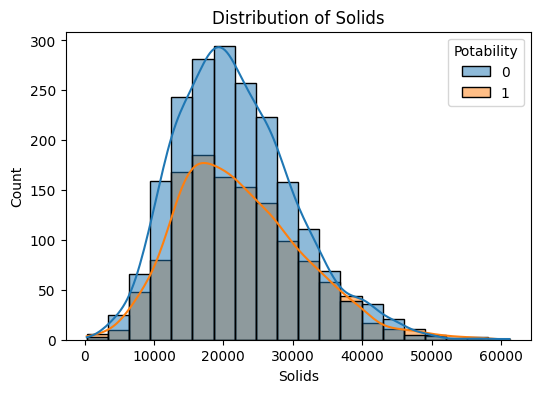

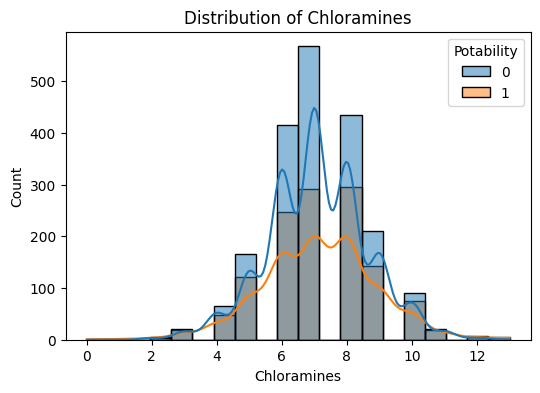

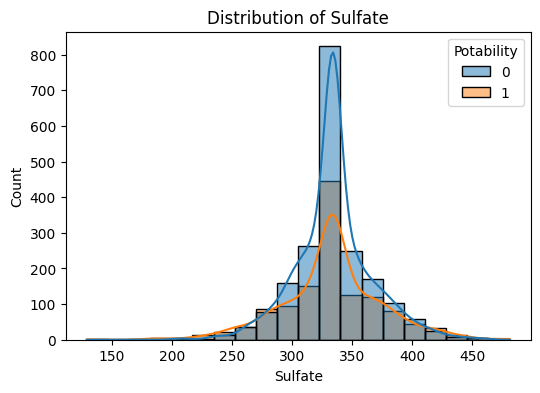

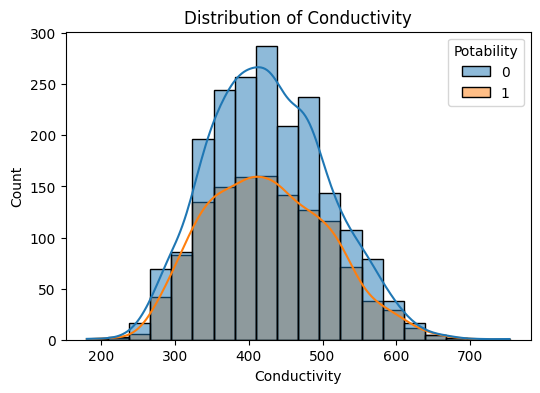

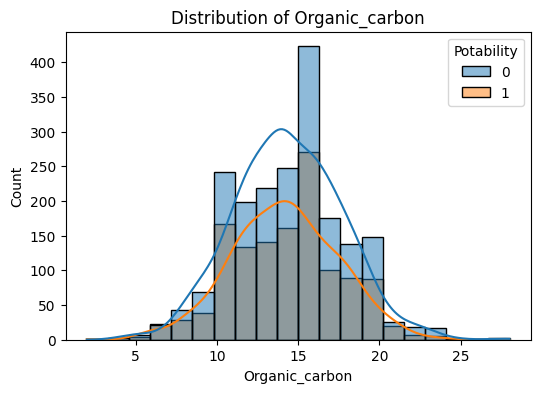

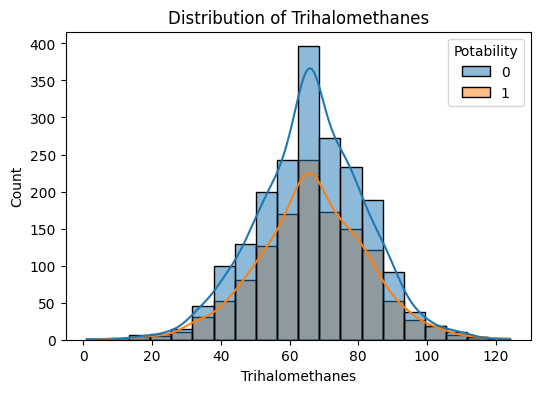

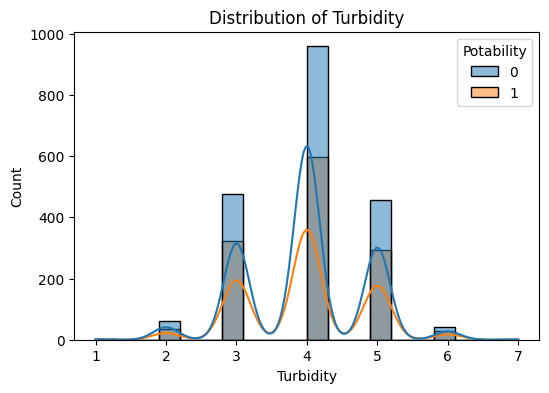

In [22]:
#plotting the distribution of each feature, categorized by 'Potability' status
columns = dt.columns.drop('Potability') #excluding the target variable 'Potability'
for col in columns:
  plt.figure(figsize=(6,4))
  sns.histplot(data = dt, x = col, kde = True, hue = 'Potability', bins = 20)
  plt.title(f'Distribution of {col}')
  plt.show()

The water class distinguishes two categories: potable and non-potable which results in visual displays of all attributes found within the data. The form of distributions for potable and non-potable water becomes more straightforward through the use of histograms with KDE.

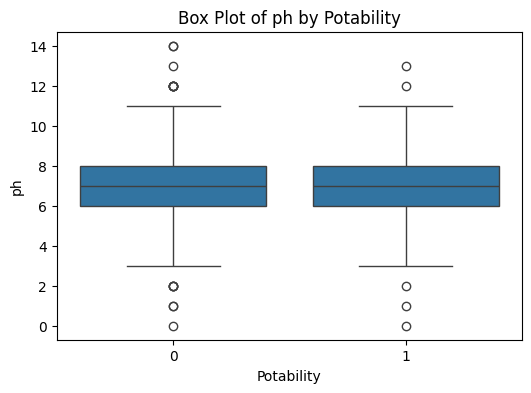

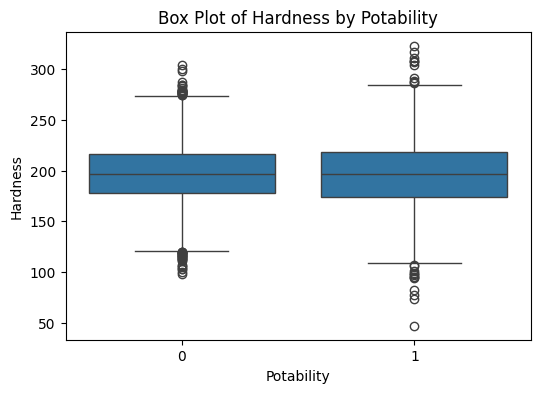

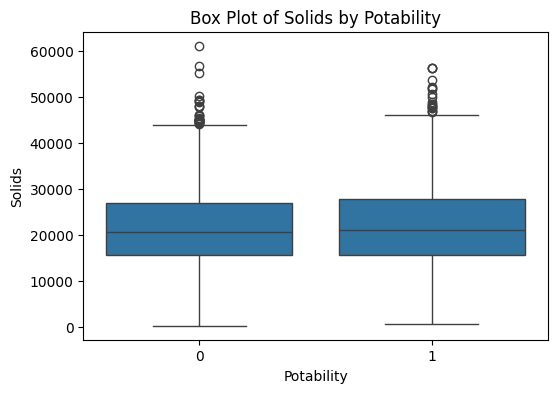

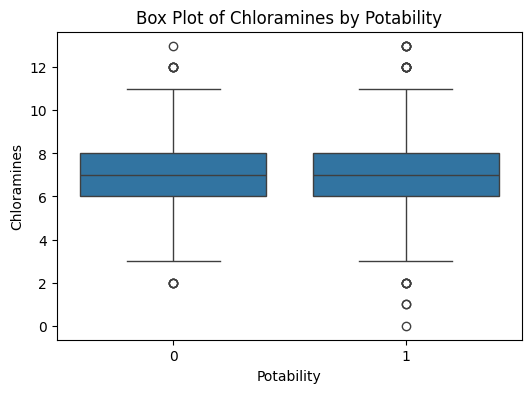

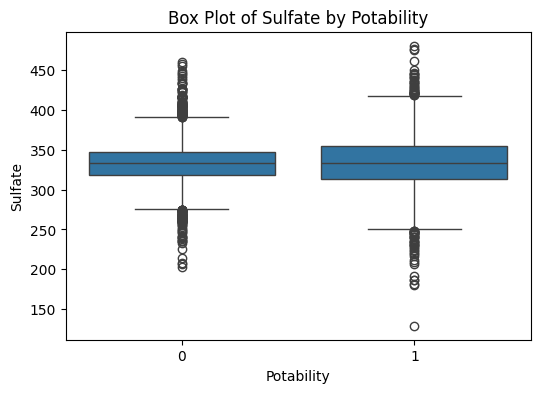

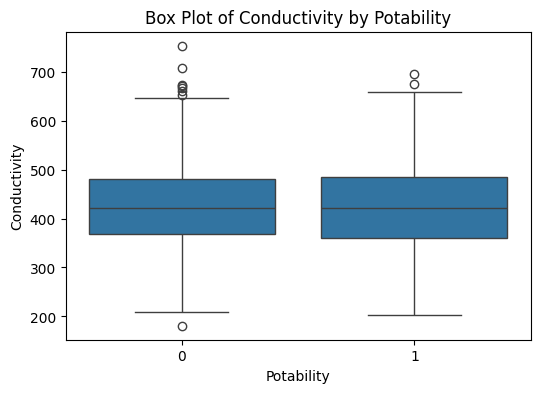

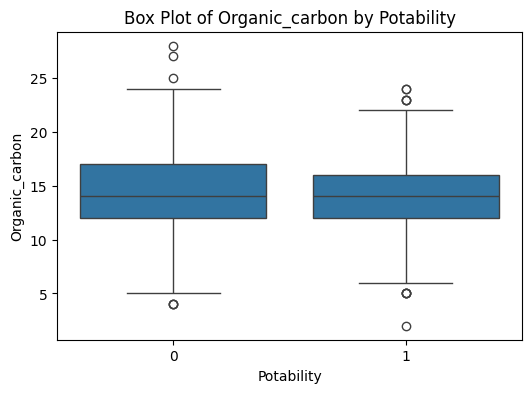

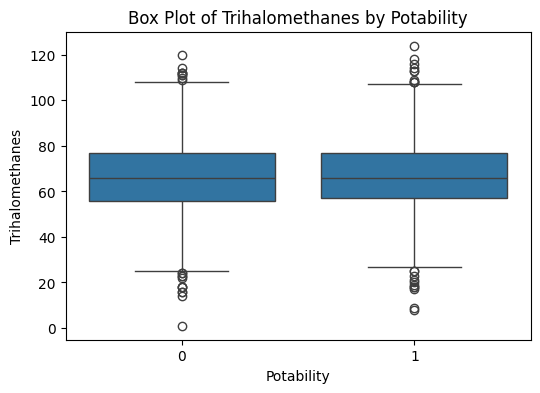

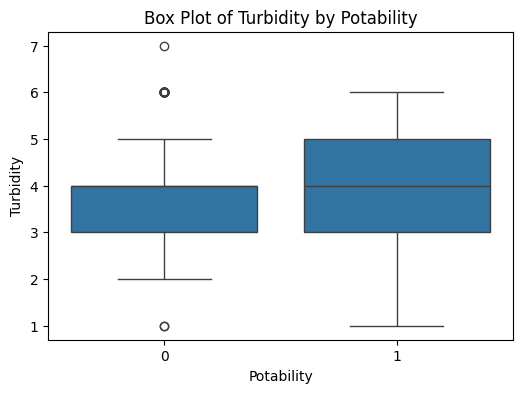

In [19]:
#creating box plots for each feature, comparing their distribution between 'Potable' and 'non-potable' water.
for col in columns:
  plt.figure(figsize = (6,4))
  sns.boxplot(data=dt, x='Potability', y=col)
  plt.title(f'Box Plot of {col} by Potability')
  plt.show()

Visualizing the attribute distributions becomes possible through these box plots which show both water types' variability differences. The plots present information about central tendency and distribution together with outlier potential for each attribute in the several potability categories.

###Bivariate Analysis.

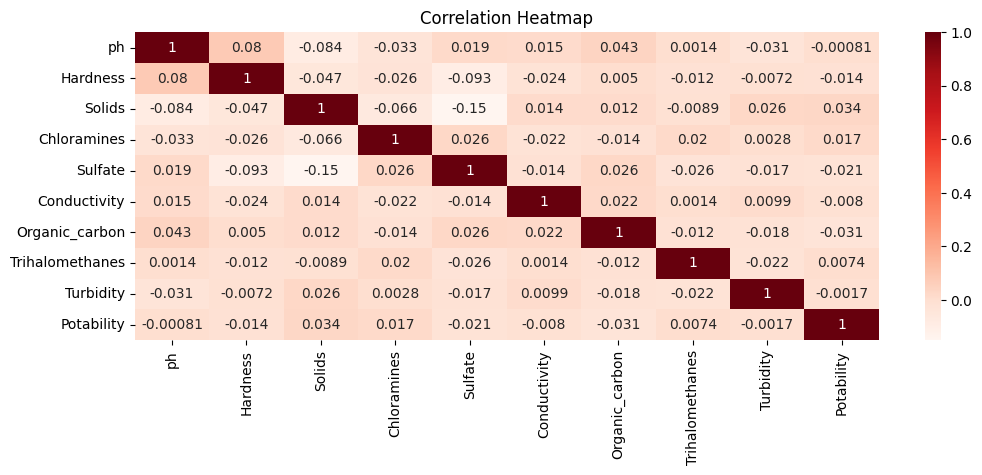

In [26]:
#creating heatmap to visualize the correlation matrix of the features in the dataset
plt.figure(figsize=(12, 4))
sns.heatmap(dt.corr(), annot = True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

This heatmap presents the correlation matrix of the features found within the water potability dataset. This display reveals the connection levels and orientations between different pairs and attributes using color intensity.


The potability dataset presents its water quality indicator correlation coefficients as a heatmap visual presentation. Diagonal elements in this table show values of 1 which demonstrates perfect correlation between every entry. The most extreme positive and negative correlations appear as red and blue links while 1 and -1 show as strongest links. "A Strong Negative Relationship" demonstrates that "Hardness" shares -0.84 negative correlation with "Solids". A somewhat positive link (0.43) exists between "Organic_carbon" levels and "Trihalomethanes" content indicating such substances have potential shared relationships. The water potability dataset enables easy identification of correlations through its visual representation in the heatmap.





#Train-Test Split

In [27]:
#separating the features (X) and the target variable (y) in the dataset
X = dt.drop(columns = 'Potability')
y = dt['Potability']

In [28]:
#splitting the dataset into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Decision Tree Classifier.

In [29]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

In [30]:
# Evaluate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')

Decision Tree Accuracy: 0.5899


In [31]:
#creating a confusion matrix to evaluate the performance of a classification model.
confusionMatrix = metrics.confusion_matrix(y_test, y_pred_dt)

The model predictions compared to true values get organized into a tabular format through the confusion matrix. The confusion matrix provides information about both true and false outcomes in four categorizes. The classification model's performance evaluation benefits from the use of such a matrix representation.

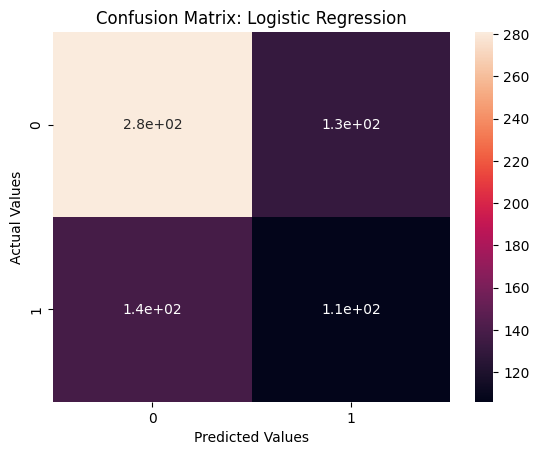

In [32]:
#visualizing the confusion matrix for logistic regression prediction
plt.title("Confusion Matrix: Logistic Regression")
sns.heatmap(confusionMatrix, annot = True)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

A heatmap presents the confusion matrix which depicts the predictions made by logistic regression. Each statistical count encompassing true positive, true negative, false positive, and false negative values comes from the provided annotations. The graphic maintains a valuable role to assess the model's performance at distinguishing actual values from predicted values.

In [33]:
#displaying the classification report for logistic regression prediction
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       412
           1       0.45      0.43      0.44       244

    accuracy                           0.59       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.59      0.59       656



The classfication report offers complete performance assessment of the model by presenting precision together with recall values along with F1-score and support statistics for each class. Classfication reports function as an assessment instrument which provides multiple metric evaluations for classification model achievement.

###Random Forest Classifier.

In [34]:
#creating and training a Random Forest Classifier with 100 estimators and random state of 42
rf_classifier = RandomForestClassifier (n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

#making predictions on the test set using the trained random forest classifier
y_pred_test = rf_classifier.predict(X_test)

In [35]:
#calculating the accuracy score of the random forest classifier on the training set.
rf_classifier.score(X_train, y_train)

1.0

In [36]:
#calculating the accuracy score of the random forest classifeir on the  test set.
rf_classifier.score(X_test, y_test)

0.6737804878048781

In [38]:
#creating a confusion matrix to evaluate the performance of the RFC on the test set
confusionMatrix = metrics.confusion_matrix(y_test, y_pred_test)

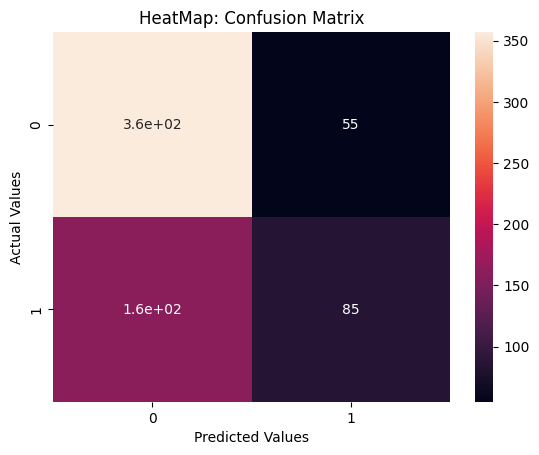

In [39]:
#visualizing the confusion matrix as a heatmap for the RFC predictions
plt.title("HeatMap: Confusion Matrix")
sns.heatmap(confusionMatrix, annot = True)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

The graphical depiction of the Random Forest Classifier prediction labels on the set can be found in this confusion matrix heatmap. The annotations provide counts for true positive, true negative, false positive and false negative cases. This figure enables evaluating the model's performance in correctly identifying actual and predicted values.

In [40]:
print(metrics.classification_report(y_test, y_pred_test)) #displaying the classification report for the RFC predictions on the test sets

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.61      0.35      0.44       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656



This classification report consists of a detailed test set performance summary that includes precision, recall, F1-score and support for each class of the Random Forest Classifier. Several measures combine to form this complete performance evaluation of the model.

Results showed that Random Forest Classifier delivered superior performance than Decision Tree Classifier through test accuracy of 0.6738 and 0.5899. Both accuracy levels of Random Forest Classifier surpass Decision Tree_classifier in test scenarios and training data yielded 100% accuracy. Overfitting could be indicated by this performance. The Random Forest Classifier proves to be the most successful methodology for analyzing this dataset.

#Hyper-Parameter Tuning Using Grid Search.

###Decision Tree Hyper-Parameter Tuning.

In [41]:
#defining the grid of hyperparameters for tuning a DTC
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [42]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}


###Random Forest Classifier Hyper-Parameter Tuning.

In [43]:
# Defining a grid of hyperparameters for tuning a Random Forest Classifier
param_grid = {
    'n_estimators' : [50, 100, 150],
    'max_depth' : [None, 10, 20],
    'min_samples_split': [2,5,10],
    'max_features':['sqrt', 'log2']
}

In [44]:
rf = RandomForestClassifier(random_state=91) # Creating a Random Forest Classifier with a specified random state

In [45]:
# Setting up a GridSearchCV with Random Forest Classifier, specified hyperparameter grid, 5-fold cross-validation, and parallel processing.
grid_search =GridSearchCV(estimator =rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [46]:
# Performing grid search to find the best hyperparameters for the Random Forest Classifier.
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=91), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [47]:
grid_search.best_params_ # Displaying the best hyperparameters found by GridSearchCV for the Random Forest Classifier.

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 150}

#Feature Selection using Filter Method.

###SelectKBest

In [48]:
# Selecting the best 6 features using chi-squared (chi2) as the scoring function.
K_best_features = SelectKBest(chi2, k=6)
K_best_features.fit(X, y)

SelectKBest(k=6, score_func=<function chi2 at 0x78f131182c00>)

In [49]:
# Getting the selected features from SelectKBest based on chi-squared (chi2) scoring.
K_best_condition = K_best_features.get_support()

In [50]:
# Creating a new subset of data with features selected by chi-squared (chi2) scoring.
X_selected_chi = X[X.columns[K_best_condition]]
X_selected_chi.head()

,Hardness,Solids,Sulfate,Conductivity,Organic_carbon,Trihalomethanes
0,205,20791,369,564,10,87
1,129,18630,334,593,15,56
2,224,19910,334,419,17,66
3,214,22018,357,363,18,100
4,181,17979,310,398,12,32


In [51]:
# Splitting the dataset into training and testing sets using the selected features from chi-squared (chi2) scoring.
X_train, X_test, y_train, y_test = train_test_split(X_selected_chi, y, test_size=0.2, random_state=42)

In [52]:
grid_search.best_params_
{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 150}

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 150}

#Random Forest Final-Model

###After Hyper-Parameter tuningand feature Selection

In [53]:
# Creating the final Random Forest Classifier with the best hyperparameters.
final_random_model = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_split= 10, n_estimators = 150)

In [54]:
# Training the final Random Forest Classifier on the entire dataset using the selected features
final_random_model.fit(X_selected_chi, y)

RandomForestClassifier(min_samples_split=10, n_estimators=150)

In [55]:
# Calculating the accuracy score of the final Random Forest Classifier on the entire dataset.
final_random_model.score(X_selected_chi, y)

0.9725274725274725

#Desicion Tree Final-Model.

###After using Hyper-Parameter tuning and Feature Selection.

In [56]:
#Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}

In [57]:
# Creating the final Decision Tree Classifier with specified hyperparameters.
final_dt_model = DecisionTreeClassifier(max_depth = 10, min_samples_split= 20, criterion= 'entropy', min_samples_leaf= 1, splitter = 'random')

In [58]:
# Training the final Decision Tree Classifier on the entire dataset using the selected features.
final_dt_model.fit(X_selected_chi, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20,
                       splitter='random')

In [59]:
# Calculating the accuracy score of the final Decision Tree Classifier on the entire dataset.
final_dt_model.score(X_selected_chi, y)

0.6736874236874237

The available data indicates that the Random Forest model delivered superior results than the Decision Tree model. The Random Forest model possibly achieved better performance through cross-validation techniques in addition to feature selection methods. By employing feature selection operators overfitting is reduced while focusing on main attributes leads to superior generalizations and through cross-validation the model assessment results in higher reliability.

The research results demonstrated superior performance by the Random Forest model which included chosen features over the Decision Tree model. The potential benefits from future research on coupled techniques like gradient boosting and bagging alongside additional optimization of Random Forest model hyperparameters will be studied.


#Conclusion
We built two classifying models which included Logistic Regression and Random Forest Classifier. The development of both models started by incorporating no hyperparameter optimization or feature selection techniques.

We conducted hyperparameter tuning which generated optimal parameters for our models to evaluate their accuracy results.

We applied SelectKBest functions for implementing feature selection after hyperparameter tuning by using the chi2 and mutual_info_classif selection approaches. We evaluated the selected features through comparison before selecting the more effective ones from the mutual_info_classif method.

We applied the best hyperparameters and incorporated solely the features which originated from feature selection in the final model.

The accuracy dropped when we conducted hyperparameter optimization as well as feature selection. The trained models reached higher precision results while evaluating new data sets.

My continuing interest leads me forward to examine supervised machine learning while I aim to study unsupervised machine learning in the near future.